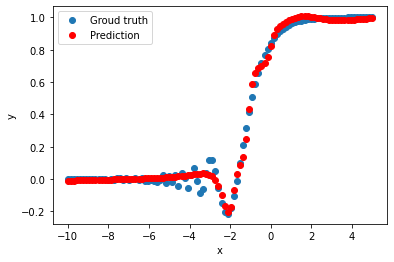

In [6]:
import torch
import matplotlib.pyplot as plt
def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(RegressionNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons,1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x= self.fc2(x)
        x = self.act2(x)
        x= self.fc3(x)
        return x

net = RegressionNet(20)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label = 'Groud truth')
    plt.plot(x.numpy(), y_pred.detach().numpy(), 'o', c='r', label = 'Prediction')
    plt.legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')


optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

def loss(pred, target):
    absolute = abs(pred - target)
    return absolute.mean()
# your code here

for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = net.forward(x_train) # make forward
    loss_value = loss(y_pred, y_train)

    loss_value.backward()
    optimizer.step()

predict(net, x_validation, y_validation)

In [7]:
def metric(pred, target):
    return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())

0.02324690669775009
